# 📝 Multiple Linear Regression with Python

# 🗃️ Data Set

We are going to use the 50_CompList dataset,which stores some infomation about 50 start-up companies.
The data contains the following columns:

R&D Spend = Money spend for Reasearch and Development Administration, Money spend for Administartion Marketing Spend, Money spend for marketing State,In which state company started Profit,How much profit gain

# 📎 Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 📄 Read CSV file

In [2]:
data = pd.read_csv('50_CompList.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 🧾 Information and description about CSV file

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Label Encoding and One hot Encoding**

In [5]:
l1 = LabelEncoder()
data.iloc[:,3] = l1.fit_transform(data.iloc[:,3])
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
dummy = pd.get_dummies(data['State'])
dummy

,0,1,2
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


# 🔍 Finding Missing values

In [7]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# 📥 Fiiling Missing values

In [8]:
df = data.fillna(method = 'ffill') 
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


# 📊Exploratory Data Analysis (EDA)

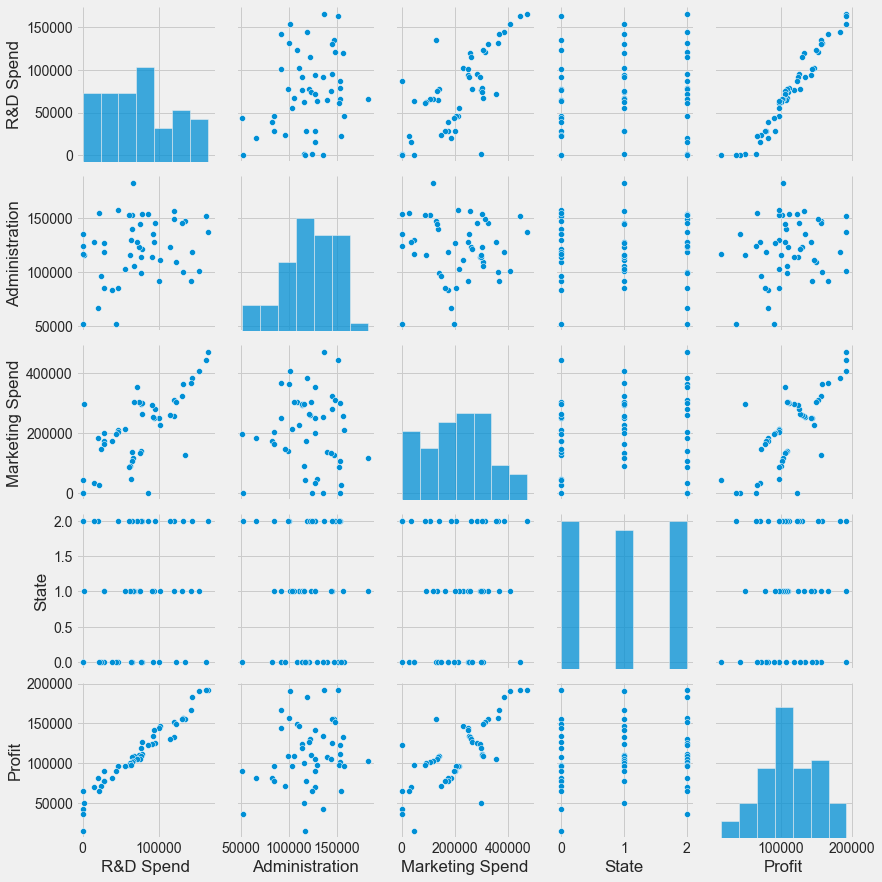

In [9]:
sns.pairplot(data)

# 📈Training a Multiple Linear Regression Model

In [10]:
#x as independent variables
x = df.iloc[:,:1].values
#y as dependent variable
y = df.iloc[:,-1:].values

# 🧮 Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# 📝 Preparing Data For Multiple Linear Regression

In [12]:
scale=StandardScaler()
scale.fit(x_train)
print(scale.transform(x_train))

[[ 1.17644103]
 [ 0.96420324]
 [-1.47369826]
 [-1.48308929]
 [-0.14952431]
 [ 0.85312042]
 [-0.22353674]
 [-0.19454707]
 [ 0.10478723]
 [-1.0096458 ]
 [ 0.06872897]
 [-1.17638797]
 [ 0.97648631]
 [ 0.39131191]
 [-0.16880669]
 [ 1.2088001 ]
 [ 0.44593006]
 [-0.90483959]
 [-1.49419935]
 [ 1.83846539]
 [ 0.42966802]
 [-0.59092478]
 [ 0.08492419]
 [ 1.26493068]
 [-0.11002675]
 [-0.90669595]
 [ 0.11250125]
 [ 0.27709192]
 [ 1.03371959]
 [-0.70388936]
 [-1.46723718]
 [ 1.46491286]
 [ 1.89486118]
 [-1.49419935]
 [-1.0396359 ]]


In [13]:
scale=MinMaxScaler()
scale.fit(x_train)
print(scale.transform(x_train))

[[0.7880179 ]
 [0.72539353]
 [0.0060492 ]
 [0.00327821]
 [0.39676926]
 [0.69261666]
 [0.37493063]
 [0.38348453]
 [0.47180821]
 [0.14297577]
 [0.46116861]
 [0.09377566]
 [0.72901786]
 [0.55635219]
 [0.39107967]
 [0.797566  ]
 [0.57246821]
 [0.17390063]
 [0.        ]
 [0.98335946]
 [0.56766982]
 [0.26652654]
 [0.46594728]
 [0.81412828]
 [0.40842369]
 [0.17335288]
 [0.47408436]
 [0.52264964]
 [0.74590551]
 [0.23319442]
 [0.00795565]
 [0.87313643]
 [1.        ]
 [0.        ]
 [0.13412668]]


**Multiple Linear Regression**

In [14]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

# 📌 Predictions from Model

In [15]:
y_pred = reg.predict(x_test)

In [16]:
print("Predicted Profit:",y_pred)
print("Actual Profit:",y_test)

Predicted Profit: [[104347.29054818]
 [134059.15325094]
 [135124.30398379]
 [ 71598.91750239]
 [179346.89726824]
 [109544.72355241]
 [ 65022.1146424 ]
 [100129.03206143]
 [111164.14538661]
 [169619.71578557]
 [ 95286.60066917]
 [ 87150.76014861]
 [112309.27339546]
 [ 87504.38861279]
 [126401.4513695 ]]
Actual Profit: [[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]
 [ 96778.92]
 [ 96479.51]
 [105733.54]
 [ 96712.8 ]
 [124266.9 ]]


# ✔️ Checking Accuracy

In [17]:
Accuracy = reg.score(x,y)*100
Accuracy

94.57789853263586

Mean Squared Error (MSE)

In [18]:
MSE = mean_squared_error(y_test,y_pred)
MSE

61737390.72238975

In [19]:
ms = math.sqrt(MSE)
ms

7857.314472667475

Mean Absolute Error (MAE)

In [20]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

6435.898401389121

In [21]:
ma = math.sqrt(MAE)
ma

80.22405126512324

# 📊 Plotting the Graph for Accuracy

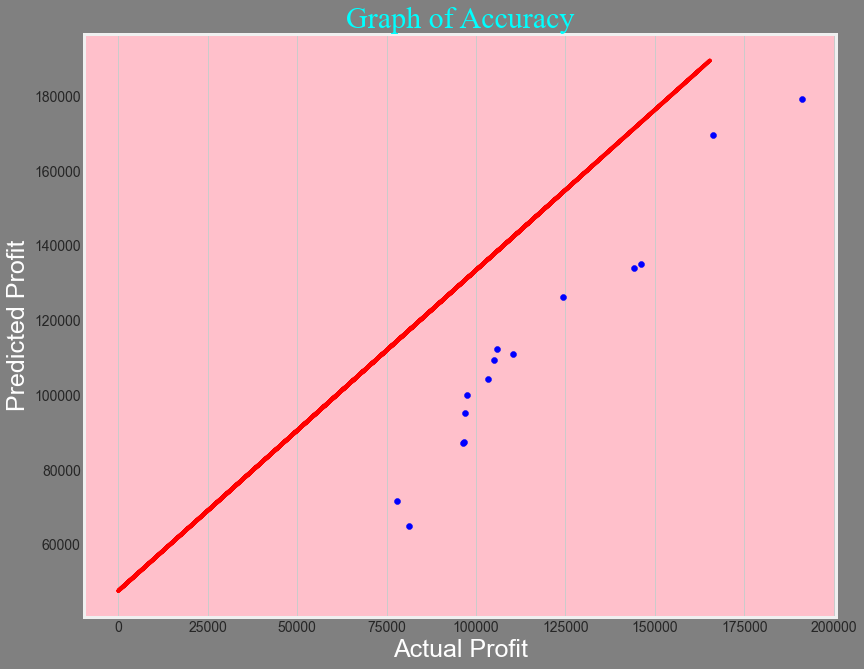

In [22]:
f1 = {'family':'Arial','color':'white','size':25}
f2 = {'family':'Times New Roman','color':'cyan','size':30}

plt.figure(facecolor = 'grey',figsize=(12,10)) #figsize for changing the size of graph

ax1 = plt.axes()
ax1.set_facecolor("Pink") #inner layer color(#passing the attribite to color function)

plt.scatter(y_test, y_pred, color='blue')
plt.plot(x_train,reg.predict(x_train), color='red')
plt.title("Graph of Accuracy", fontdict = f2)
plt.xlabel("Actual Profit", fontdict = f1)
plt.ylabel("Predicted Profit", fontdict = f1)
plt.grid(color='green',linestyle=':',linewidth=1.5,axis='y') 
plt.show()

## 🖋️ Thank You